In [11]:
import mediapipe as mp
import cv2
from dollarpy import Recognizer, Template, Point
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [12]:
templates = []
sub_templates = []

In [34]:
def getPoints(videoURL, label):
    cap = cv2.VideoCapture(videoURL)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5, ) as holistic:
        points = []
        # left_wrist = []
        right_wrist = []
        # left_pinky = []
        right_pinky = []

        # m_left_wrist = []
        m_right_wrist = []
        # m_left_pinky = []
        m_right_pinky = []

        while cap.isOpened():
            ret, frame = cap.read()
            if ret != True:
                break
            if ret == True:
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False
                # for detection
                results = holistic.process(image)

                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

                try:
                    pose = results.pose_landmarks.landmark
                    index = 0
                    newlist = []
                    for lnd in pose:
                        if (index in [15, 16, 17, 18, 19, 20, 21, 22]):
                            newlist.append(lnd)
                        index += 1
                    # left_wrist.append(Point(newlist[0].x, newlist[0].y, 1))
                    right_wrist.append(Point(newlist[1].x, newlist[1].y, 2))
                    # left_pinky.append(Point(newlist[2].x, newlist[2].y, 3))
                    right_pinky.append(Point(newlist[3].x, newlist[3].y, 4))

                    # m_left_wrist.append((newlist[0].x, newlist[0].y))
                    m_right_wrist.append((newlist[1].x, newlist[1].y))
                    # m_left_pinky.append((newlist[2].x, newlist[2].y))
                    m_right_pinky.append((newlist[3].x, newlist[3].y))

                    # to get all values of x,y, and z in the newlist and flatten it(put it in 1 dimension)
                    pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility]
                                              for landmark in newlist]).flatten())

                    # face = results.face_landmarks.landmark

                    row = pose_row

                except:
                    pass

                # cv2.imshow("test",image)
                if cv2.waitKey(1) == 27:
                    break

    cap.release()
    cv2.destroyAllWindows()
    points = right_wrist+right_pinky
    print(label)
    print(m_right_wrist)
    xs, ys = zip(*m_right_wrist)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_pinky)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')

    # xs, ys = zip(*m_left_wrist)
    # plt.plot(xs, ys, 'o')
    # plt.plot(xs, ys, '-')
    # xs, ys = zip(*m_left_pinky)
    # plt.plot(xs, ys, 'o')
    # plt.plot(xs, ys, '-')

    plt.gca().invert_yaxis()

    plt.show()
    return points

In [30]:
def getPointsLive():
    cap = cv2.VideoCapture(0)
    # address = "http://192.168.1.15:8080/video"
    # cap.open(address)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.7) as holistic:
        points = []
        left_wrist = []
        right_wrist = []
        left_pinky = []
        right_pinky = []

        m_left_wrist = []
        m_right_wrist = []
        m_left_pinky = []
        m_right_pinky = []
        while cap.isOpened():
            ret, frame = cap.read()
            if ret != True:
                break
            if ret == True:
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False
                # for detection
                results = holistic.process(image)

                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

                mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                          mp_drawing.DrawingSpec(
                                              color=(80, 22, 10), thickness=2, circle_radius=4),
                                          mp_drawing.DrawingSpec(
                                              color=(80, 44, 121), thickness=2, circle_radius=2)
                                          )

                # mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                #                           mp_drawing.DrawingSpec(
                #                               color=(121, 22, 76), thickness=2, circle_radius=4),
                #                           mp_drawing.DrawingSpec(
                #                               color=(121, 44, 250), thickness=2, circle_radius=2)
                #                           )

                try:
                    pose = results.pose_landmarks.landmark
                    index = 0
                    newlist = []
                    for lnd in pose:
                        if (index in [15, 16, 17, 18, 19, 20, 21, 22]):
                            newlist.append(lnd)
                        index += 1
                    left_wrist.append(Point(newlist[0].x, newlist[0].y, 1))
                    right_wrist.append(Point(newlist[1].x, newlist[1].y, 2))
                    left_pinky.append(Point(newlist[2].x, newlist[2].y, 3))
                    right_pinky.append(Point(newlist[3].x, newlist[3].y, 4))

                    m_left_wrist.append((newlist[0].x, newlist[0].y))
                    m_right_wrist.append((newlist[1].x, newlist[1].y))
                    m_left_pinky.append((newlist[2].x, newlist[2].y))
                    m_right_pinky.append((newlist[3].x, newlist[3].y))

                    # to get all values of x,y, and z in the newlist and flatten it(put it in 1 dimension)
                    pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility]
                                              for landmark in newlist]).flatten())

                    face = results.face_landmarks.landmark

                    row = pose_row

                except:
                    pass

            cv2.imshow("123", image)
            if cv2.waitKey(1) == 27:
                break

    xs, ys = zip(*m_right_wrist)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_pinky)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')

    xs, ys = zip(*m_left_wrist)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_left_pinky)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    cap.release()
    cv2.destroyAllWindows()
    points = right_wrist+right_pinky
    plt.gca().invert_yaxis()
    plt.show()
    return points

right
[(0.6267305016517639, 0.48953408002853394), (0.6274821758270264, 0.48979613184928894), (0.6283738017082214, 0.48987725377082825), (0.6283170580863953, 0.4909094274044037), (0.6283693313598633, 0.4910446107387543), (0.6279487013816833, 0.491041362285614), (0.6274374127388, 0.4910520315170288), (0.6269478797912598, 0.49116307497024536), (0.6264235973358154, 0.491089403629303), (0.6260093450546265, 0.49108707904815674), (0.6258443593978882, 0.491080641746521), (0.6255365014076233, 0.491193026304245), (0.6251522898674011, 0.49150314927101135), (0.6242212057113647, 0.49213963747024536), (0.6235671043395996, 0.4926978647708893), (0.6235414147377014, 0.4929390549659729), (0.6236852407455444, 0.4929738938808441), (0.6241064071655273, 0.49280232191085815), (0.6237605810165405, 0.49273157119750977), (0.6231978535652161, 0.4922395944595337), (0.6230035424232483, 0.4915790855884552), (0.622999906539917, 0.49150270223617554), (0.6230434775352478, 0.4915025532245636), (0.6227181553840637, 0.49

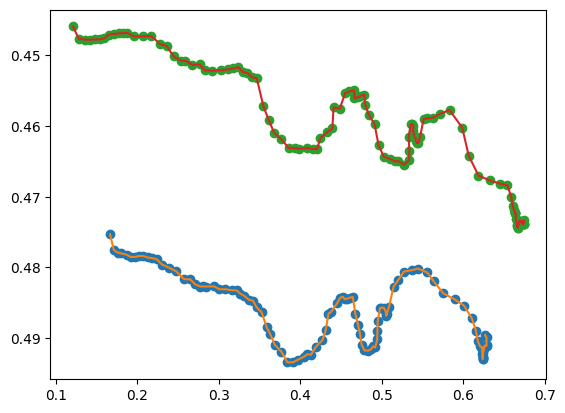

left
[(0.2068241536617279, 0.5336250066757202), (0.2045741081237793, 0.5324429869651794), (0.20307394862174988, 0.5316563844680786), (0.20244501531124115, 0.5314049124717712), (0.20198698341846466, 0.5310690402984619), (0.20157870650291443, 0.5306704640388489), (0.2014787644147873, 0.5305488109588623), (0.20147795975208282, 0.5305195450782776), (0.20155493915081024, 0.5304417014122009), (0.20212140679359436, 0.5304450392723083), (0.20278985798358917, 0.5304473638534546), (0.20342111587524414, 0.5304498672485352), (0.20372547209262848, 0.53047776222229), (0.204423189163208, 0.5305353403091431), (0.20465826988220215, 0.5305396914482117), (0.20485946536064148, 0.5306816101074219), (0.2048649787902832, 0.5307173132896423), (0.20491185784339905, 0.530725359916687), (0.20494504272937775, 0.5305822491645813), (0.2048211395740509, 0.529801070690155), (0.20481814444065094, 0.5288305878639221), (0.20537139475345612, 0.5276135802268982), (0.20695705711841583, 0.5269396305084229), (0.2091896384954

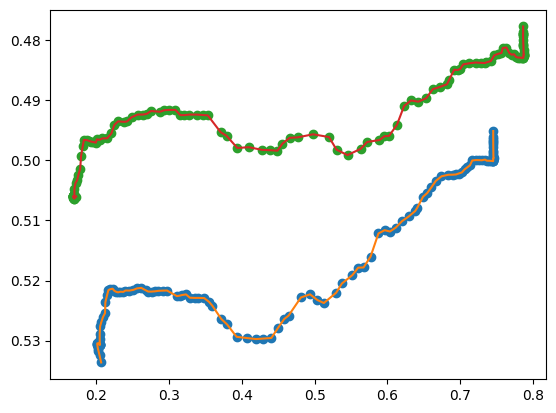

In [35]:
# training
vid = "C:\\Users\\ziads\\Documents\\MSA\\Sem 7\\CS484\\Project\Main\\vids\\slowright-right.mp4"
points = getPoints(vid, "right")
tmpl_2 = Template('right', points)
templates.append(tmpl_2)


vid = "C:\\Users\\ziads\\Documents\\MSA\\Sem 7\\CS484\\Project\\Main\\vids\\slowright-left.mp4"
points = getPoints(vid, "left")
tmpl_2 = Template('left', points)
templates.append(tmpl_2)

In [ ]:
import socket
import threading


def send(conn, data):
    msg = bytes(data, 'utf-8')
    print(msg)
    conn.send(msg)

In [ ]:
mySocket = socket.socket()
mySocket.bind(('localhost', 3000))
mySocket.listen()
conn, addr = mySocket.accept()
send_thread = threading.Thread(target=send, args=(conn, ''))
send_thread.start()

In [ ]:
# testing
points = getPointsLive()
tmpl = Template('', points)
# templates.append(tmpl")
print(points)
recognizer = Recognizer(templates)
result = recognizer.recognize(points)
if result[0] != None:
    if result[0] == 'left':
        send(conn, '0')
    if result[0] == 'right':
        send(conn, '1')
print(result)

In [ ]:

var1 = "1"
# while True:
#   if var1 == 0:
#      send(conn, var1)
#     var1 = 99
# if var1 == 1:
#   send(conn,var1)
#  var1 = 99'''

In [ ]:
send(conn, var1)

In [ ]:
send_thread.join()
mySocket.close()